In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
from scipy.spatial.transform import Rotation as R

In [3]:
lidar_df = pd.read_csv("../data/raw_dataset_lidar.csv")
odom_df = pd.read_csv("../data/raw_dataset_odom.csv")

In [4]:
lidar_df

,Unnamed: 0,frame_id,time_sec,time_nanosec,angle_min,angle_max,angle_increment,time_increment,scan_time,range_min,range_max,ranges,intensities
0,0,base_scan,467,569000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
1,1,base_scan,467,769000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2,2,base_scan,467,969000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
3,3,base_scan,468,168000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
4,4,base_scan,468,369000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,base_scan,627,369000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.78607696 0.7623259 0.73291117 0.6921672 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
800,800,base_scan,627,569000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.7896669 0.76030785 0.72601223 0.71659404 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
801,801,base_scan,627,769000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.7796455 0.74736875 0.72419274 0.707664 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
802,802,base_scan,627,969000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.78088635 0.75203294 0.73608536 0.71106905 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...


In [5]:
odom_df

,Unnamed: 0,frame_id,time_sec,time_nanosec,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,orientation_x,orientation_y,orientation_z,orientation_w,omega_x,omega_y,omega_z,covariance_pos,covariance_vel
0,0,odom,467,566000000,-1.999914,-0.500001,0.008535,0.000004,-4.460000e-09,0,0.000049,0.002867,0.000006,0.999996,0,0,-5.280000e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
1,1,odom,467,600000000,-1.999914,-0.500001,0.008532,0.000004,-1.540000e-08,0,0.000049,0.002867,0.000006,0.999996,0,0,-6.320000e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
2,2,odom,467,634000000,-1.999914,-0.500001,0.008530,0.000004,-2.500000e-08,0,0.000049,0.002867,0.000006,0.999996,0,0,-6.790000e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
3,3,odom,467,668000000,-1.999914,-0.500001,0.008533,0.000002,-9.430000e-10,0,0.000049,0.002868,0.000006,0.999996,0,0,-6.470000e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4,4,odom,467,702000000,-1.999914,-0.500001,0.008527,0.000002,-2.890000e-08,0,0.000049,0.002868,0.000006,0.999996,0,0,-8.110000e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,4724,odom,628,182000000,-1.888463,-1.208647,0.008532,0.000007,-1.420000e-06,0,0.002702,-0.000966,-0.949801,-0.312843,0,0,1.700000e-06,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4725,4725,odom,628,216000000,-1.888463,-1.208647,0.008530,0.000003,2.020000e-06,0,0.002707,-0.000965,-0.949801,-0.312843,0,0,6.130000e-07,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4726,4726,odom,628,250000000,-1.888463,-1.208647,0.008527,0.000004,-3.160000e-06,0,0.002709,-0.000963,-0.949801,-0.312843,0,0,1.010000e-06,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4727,4727,odom,628,284000000,-1.888463,-1.208647,0.008533,0.000003,2.590000e-06,0,0.002710,-0.000961,-0.949801,-0.312843,0,0,8.960000e-07,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...


In [6]:
# selecting useful features
lidar_cols = ['frame_id', 'time_sec', 'time_nanosec', 'ranges']
odom_cols = ['frame_id', 'position_x', 'position_y', 'position_z', 'velocity_x', 'velocity_y', 'velocity_z', 'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w', 'omega_x', 'omega_y', 'omega_z']

# DataFrames containing (almost) matched lidar and odom data
lidar_match = pd.DataFrame()
odom_match = pd.DataFrame()

times_s = lidar_df['time_sec']
times_nano = lidar_df['time_nanosec']
for i in range(len(times_s)):
  # selecting frames with same time (s)
  odoms_s = odom_df[odom_df['time_sec'] == times_s[i]]
  # matching data with least time (nanosec) diff
  diff_nanosec = pd.Series(odoms_s['time_nanosec'] - lidar_df.iloc[i]['time_nanosec'])
  min_diff = abs(diff_nanosec).idxmin()
  lidar_match = pd.concat([lidar_match, lidar_df.loc[i, lidar_cols]], axis=1)
  odom_match = pd.concat([odom_match, odoms_s.loc[min_diff, odom_cols]], axis=1)

# ensuring cols are the featuers
lidar_match = lidar_match.T
odom_match = odom_match.T

In [7]:
# substituting 'frame_id' fields with ranges to help merge later
lidar_match['frame_id'] = range(len(lidar_match))
odom_match['frame_id'] = range(len(odom_match))

In [8]:
odom_match

,frame_id,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,orientation_x,orientation_y,orientation_z,orientation_w,omega_x,omega_y,omega_z
0,0,-1.999914,-0.500001,0.008535,0.000004,-0.0,0,0.000049,0.002867,0.000006,0.999996,0,0,-0.0
6,1,-1.999914,-0.500001,0.008527,0.000001,-0.0,0,0.000049,0.002867,0.000006,0.999996,0,0,-0.0
12,2,-1.999914,-0.500001,0.008533,0.000005,-0.0,0,0.000049,0.002868,0.000006,0.999996,0,0,-0.0
18,3,-1.999914,-0.500001,0.008532,0.000002,-0.0,0,0.000049,0.002865,0.000006,0.999996,0,0,-0.0
24,4,-1.999914,-0.500001,0.008535,0.000003,0.0,0,0.000049,0.002869,0.000006,0.999996,0,0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,799,-1.888463,-1.208648,0.008536,0.0,-0.000006,0,0.002692,-0.000934,-0.949801,-0.312843,0,0,0.000002
4706,800,-1.888463,-1.208647,0.008532,0.000008,-0.000006,0,0.002695,-0.000965,-0.949801,-0.312843,0,0,0.000002
4712,801,-1.888463,-1.208647,0.008531,0.000003,-0.000003,0,0.002712,-0.000982,-0.949801,-0.312843,0,0,0.0
4718,802,-1.888463,-1.208647,0.008534,0.000003,-0.000003,0,0.002683,-0.000971,-0.949801,-0.312843,0,0,0.000001


In [9]:
# final DataFrame with both lidar and odom data
merged_df = lidar_match.merge(odom_match, how="inner", on='frame_id')
merged_df

,frame_id,time_sec,time_nanosec,ranges,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,orientation_x,orientation_y,orientation_z,orientation_w,omega_x,omega_y,omega_z
0,0,467,569000000,[ inf inf inf inf ...,-1.999914,-0.500001,0.008535,0.000004,-0.0,0,0.000049,0.002867,0.000006,0.999996,0,0,-0.0
1,1,467,769000000,[ inf inf inf inf ...,-1.999914,-0.500001,0.008527,0.000001,-0.0,0,0.000049,0.002867,0.000006,0.999996,0,0,-0.0
2,2,467,969000000,[ inf inf inf inf ...,-1.999914,-0.500001,0.008533,0.000005,-0.0,0,0.000049,0.002868,0.000006,0.999996,0,0,-0.0
3,3,468,168000000,[ inf inf inf inf ...,-1.999914,-0.500001,0.008532,0.000002,-0.0,0,0.000049,0.002865,0.000006,0.999996,0,0,-0.0
4,4,468,369000000,[ inf inf inf inf ...,-1.999914,-0.500001,0.008535,0.000003,0.0,0,0.000049,0.002869,0.000006,0.999996,0,0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,627,369000000,[0.78607696 0.7623259 0.73291117 0.6921672 0...,-1.888463,-1.208648,0.008536,0.0,-0.000006,0,0.002692,-0.000934,-0.949801,-0.312843,0,0,0.000002
800,800,627,569000000,[0.7896669 0.76030785 0.72601223 0.71659404 0...,-1.888463,-1.208647,0.008532,0.000008,-0.000006,0,0.002695,-0.000965,-0.949801,-0.312843,0,0,0.000002
801,801,627,769000000,[0.7796455 0.74736875 0.72419274 0.707664 0...,-1.888463,-1.208647,0.008531,0.000003,-0.000003,0,0.002712,-0.000982,-0.949801,-0.312843,0,0,0.0
802,802,627,969000000,[0.78088635 0.75203294 0.73608536 0.71106905 0...,-1.888463,-1.208647,0.008534,0.000003,-0.000003,0,0.002683,-0.000971,-0.949801,-0.312843,0,0,0.000001


In [ ]:
merged_df.to_csv("../data/merged_lidar_odom_data.csv", index=False)

In [10]:
# from pierros-dev
def expand_column(df, column_name):
    # Remove brackets and extra spaces/newlines, then split into individual values
    clean_data = df[column_name].apply(lambda x: x.replace('[', '').replace(']', '').replace('\n', ' ').strip().split())
    # Convert 'inf' to np.inf and convert values to float
    clean_data = clean_data.apply(lambda x: [np.inf if v == 'inf' else float(v) for v in x])
    
    # Create a new DataFrame with the expanded columns
    expanded_df = pd.DataFrame(clean_data.tolist(), index=df.index)
    # Rename the columns
    expanded_df.columns = [f"{column_name}_{i+1}" for i in range(expanded_df.shape[1])]
    
    return expanded_df

In [11]:
merged_df = pd.read_csv("../data/merged_lidar_odom_data.csv")
merged_df = pd.concat([merged_df, expand_column(merged_df, 'ranges')], axis=1)
merged_df = merged_df.drop(["ranges"], axis=1)
merged_df

,frame_id,time_sec,time_nanosec,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,orientation_x,...,ranges_351,ranges_352,ranges_353,ranges_354,ranges_355,ranges_356,ranges_357,ranges_358,ranges_359,ranges_360
0,0,467,569000000,-1.999914,-0.500001,0.008535,4.291550e-06,-4.461494e-09,0.0,0.000049,...,3.071985,3.150240,inf,inf,inf,inf,inf,inf,inf,inf
1,1,467,769000000,-1.999914,-0.500001,0.008527,6.431010e-07,-1.885934e-08,0.0,0.000049,...,3.062370,3.142418,inf,inf,inf,inf,inf,inf,inf,inf
2,2,467,969000000,-1.999914,-0.500001,0.008533,4.787789e-06,-7.773991e-09,0.0,0.000049,...,3.063465,3.150345,inf,inf,inf,inf,inf,inf,inf,inf
3,3,468,168000000,-1.999914,-0.500001,0.008532,1.628880e-06,-3.404293e-09,0.0,0.000049,...,3.076240,3.156050,inf,inf,inf,inf,inf,inf,inf,inf
4,4,468,369000000,-1.999914,-0.500001,0.008535,3.044212e-06,6.105791e-10,0.0,0.000049,...,3.073371,3.150319,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,627,369000000,-1.888463,-1.208648,0.008536,4.156264e-07,-6.186039e-06,0.0,0.002692,...,1.257812,1.200815,1.109682,1.050404,0.992460,0.933071,0.907008,0.872729,0.822757,0.788022
800,800,627,569000000,-1.888463,-1.208647,0.008532,8.414143e-06,-5.806749e-06,0.0,0.002695,...,1.258403,1.189105,1.107970,1.064577,0.986428,0.959633,0.894328,0.868965,0.813926,0.806505
801,801,627,769000000,-1.888463,-1.208647,0.008531,2.842868e-06,-3.237123e-06,0.0,0.002712,...,1.250107,1.193131,1.111138,1.040050,0.998215,0.952838,0.901029,0.867851,0.811486,0.798430
802,802,627,969000000,-1.888463,-1.208647,0.008534,2.803482e-06,-2.555477e-06,0.0,0.002683,...,1.243945,1.197262,1.103004,1.056016,0.998489,0.961822,0.906682,0.866689,0.793750,0.777730


In [13]:
# from pierros-dev
def radar_plot(df,index):
    # Replace np.inf with np.nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Assuming row_index is the index of the row you want to plot
    row_index = index

    # Select columns starting with 'ColumnX'
    columns_to_plot = df.filter(regex='^ranges_').columns

    # Convert selected columns to numeric
    df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')

    # Extract data for the specified row and columns
    data_to_plot = df.loc[row_index, columns_to_plot]

    # Check if data_to_plot is empty or all NaNs
    if data_to_plot.isnull().all():
        print(f"No valid data found for Row {row_index}. Radar plot cannot be generated.")
    else:
        # Number of variables
        num_vars = len(columns_to_plot)

        # Compute angle for each axis
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
        data_to_plot = np.concatenate((data_to_plot.values, [data_to_plot.values[0]]))
        angles += angles[:1]

        # Plotting radar plot
        fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
        # ax.fill(angles, data_to_plot, color='blue', alpha=0.25)
        ax.plot(angles, data_to_plot, color='blue', linewidth=2)
        ax.set_theta_offset(np.pi / 2)
        ax.set_yticklabels([])  # Hide radial ticks

        ax.set_title(f'Radar Plot of ColumnX for Row {row_index}', fontsize=12, fontweight='bold', pad=20)  # Title of the plot
        plt.show()
# radar_plot(merged_df, 0)

In [32]:
# modified from pierros-dev
def radar_data(df):
    # Replace np.inf with np.nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Select columns starting with 'ColumnX'
    columns_to_plot = df.filter(regex='^ranges_').columns

    # Convert selected columns to numeric
    df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')

    data = []

    for row_index in range(len(df)):
        # Extract data for the specified row and columns
        data_to_plot = df.loc[row_index, columns_to_plot]

        # Check if data_to_plot is empty or all NaNs
        if data_to_plot.isnull().all():
            print(f"No valid data found for Row {row_index}. Radar plot cannot be generated.")
        else:
            data_to_plot = np.concatenate((data_to_plot.values, [data_to_plot.values[0]]))
            data.append(data_to_plot)

    # Number of variables
    num_vars = len(columns_to_plot)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
    angles += angles[:1]

    return num_vars, angles, data

MovieWriter ffmpeg unavailable; using Pillow instead.


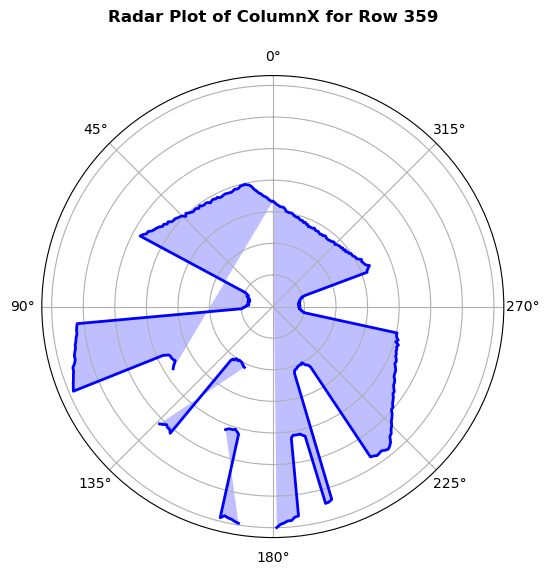

In [33]:
def radar_animation(df):
    num_vars, angles, data = radar_data(df)

    # Plotting radar plot
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
    # ax.fill(angles, data_to_plot, color='blue', alpha=0.25)
    ax.set_theta_offset(np.pi / 2)
    ax.set_yticklabels([])  # Hide radial ticks

    def update_frame(frame):
        ax.clear()
        ax.set_theta_offset(np.pi / 2)
        ax.set_yticklabels([])
        ax.set_title(f'Radar Plot of ColumnX for Row {frame}', fontsize=12, fontweight='bold', pad=20)  # Title of the plot
        
        values = data[frame]

        # Plot data
        ax.fill(angles, values, color='blue', alpha=0.25)
        ax.plot(angles, values, color='blue', linewidth=2)

    anim = FuncAnimation(fig, update_frame, frames=num_vars, interval=100)
    anim.save('radar_plot.gif', writer = 'ffmpeg', fps = 30)

radar_animation(merged_df) # saved animation in radar_plot.gif

804


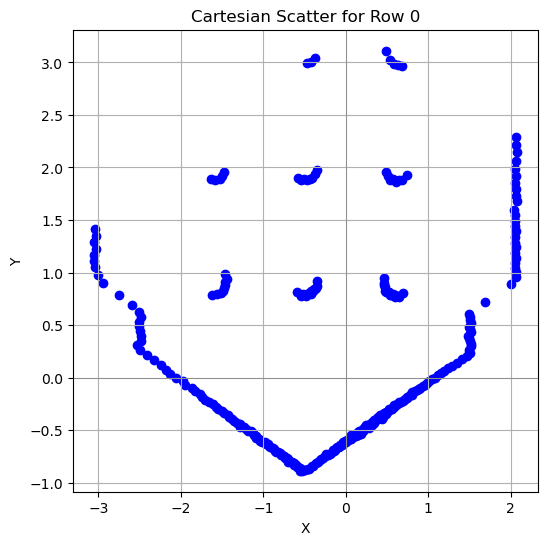

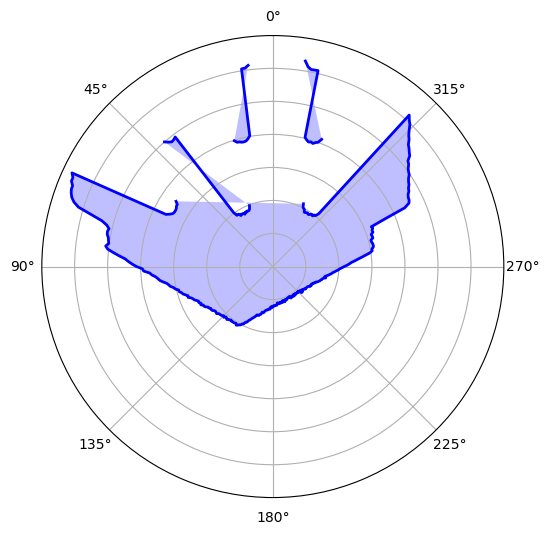

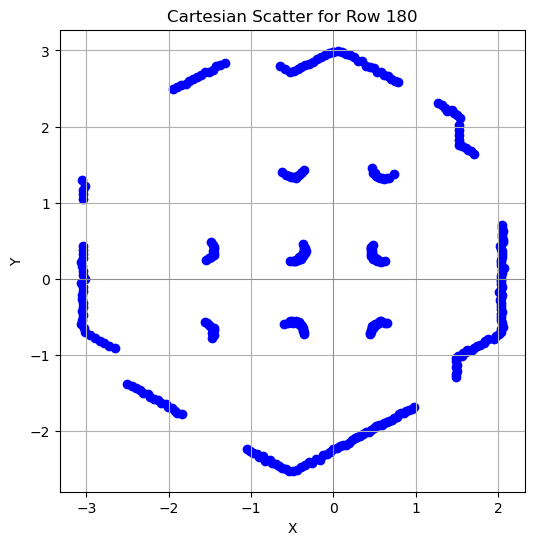

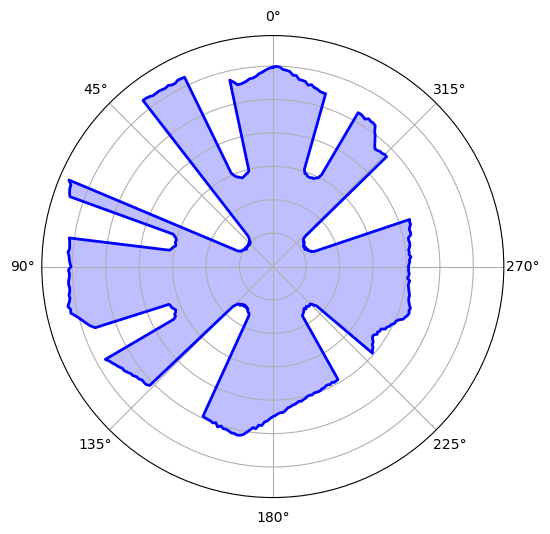

In [34]:
# TRIAL: converting polar coordinates to carterian coordinates
num_vars, angles, data = radar_data(merged_df)

def cartesian_plot(index):
    r = np.array(data[index])
    theta = np.array(angles) + np.pi/2

    x = r * np.cos(theta)
    y = r * np.sin(theta)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(x, y, color='blue')

    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Cartesian Scatter for Row {index}')
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_yticklabels([])  # Hide radial ticks
    ax.fill(angles, r, color='blue', alpha=0.25)
    ax.plot(angles, r, color='blue', linewidth=2)
    plt.show()

cartesian_plot(0)
cartesian_plot(180)

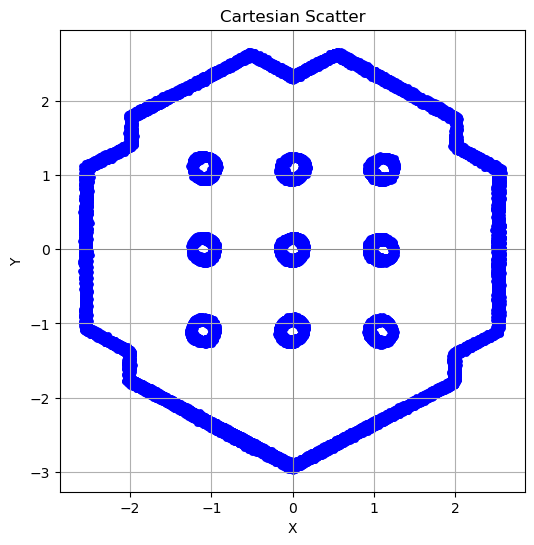

In [40]:
num_vars, angles, data = radar_data(merged_df)

pos_x = merged_df['position_x']
pos_y = merged_df['position_y']
pos_z = merged_df['position_z']

orient_x = merged_df['orientation_x']
orient_y = merged_df['orientation_y']
orient_z = merged_df['orientation_z']
orient_w = merged_df['orientation_w']

def sensor_to_world_frame(index):
    r = np.array(data[index])
    theta = np.array(angles) + np.pi/2

    # converting polar coordinates to cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # retrieving rotation matrix from quaternion measurement values
    rot = R.from_quat([orient_x[index], orient_y[index], orient_z[index], orient_w[index]])

    # converting sensor frame measurements to world frame measurements

    # rotation
    pts_vector = np.array([x[:-1], y[:-1], np.ones((num_vars))])  # remember data has +1 element due to completing radar circle
    pts_rotated = rot.as_matrix() @ pts_vector
    x, y, _ = pts_rotated

    # translation
    x -= pos_y.iloc[index]
    y += pos_x.iloc[index]

    return x, y

pts_x = np.array([]) # still includes nan values
pts_y = np.array([]) # still includes nan values
# converting all data to world frame
for i in range(len(data)):
    x, y = sensor_to_world_frame(i)
    pts_x = np.append(pts_x, x)
    pts_y = np.append(pts_y, y)

# plotting final map
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(pts_x, pts_y, color='blue', s=15)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Cartesian Scatter')
plt.show()

In [56]:
# select non-nan entries
x_nan = (np.where(~np.isnan(pts_x))[0])
y_nan = (np.where(~np.isnan(pts_y))[0])

pts_x = pts_x[x_nan]
pts_y = pts_y[y_nan]

In [58]:
# save (x, y) points to pts_data.csv
pts_data = {"x": pts_x, "y": pts_y}
pts_data = pd.DataFrame(pts_data)
pts_data.to_csv("../Data/pts_data.csv", index=False)